In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.impute import SimpleImputer
import missingno as msno

# Set plot style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


In [2]:
# Load dataset
df = pd.read_csv("../data/sierraleone-bumbuna.csv")

# Basic preview
display(df.head())
df.info()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

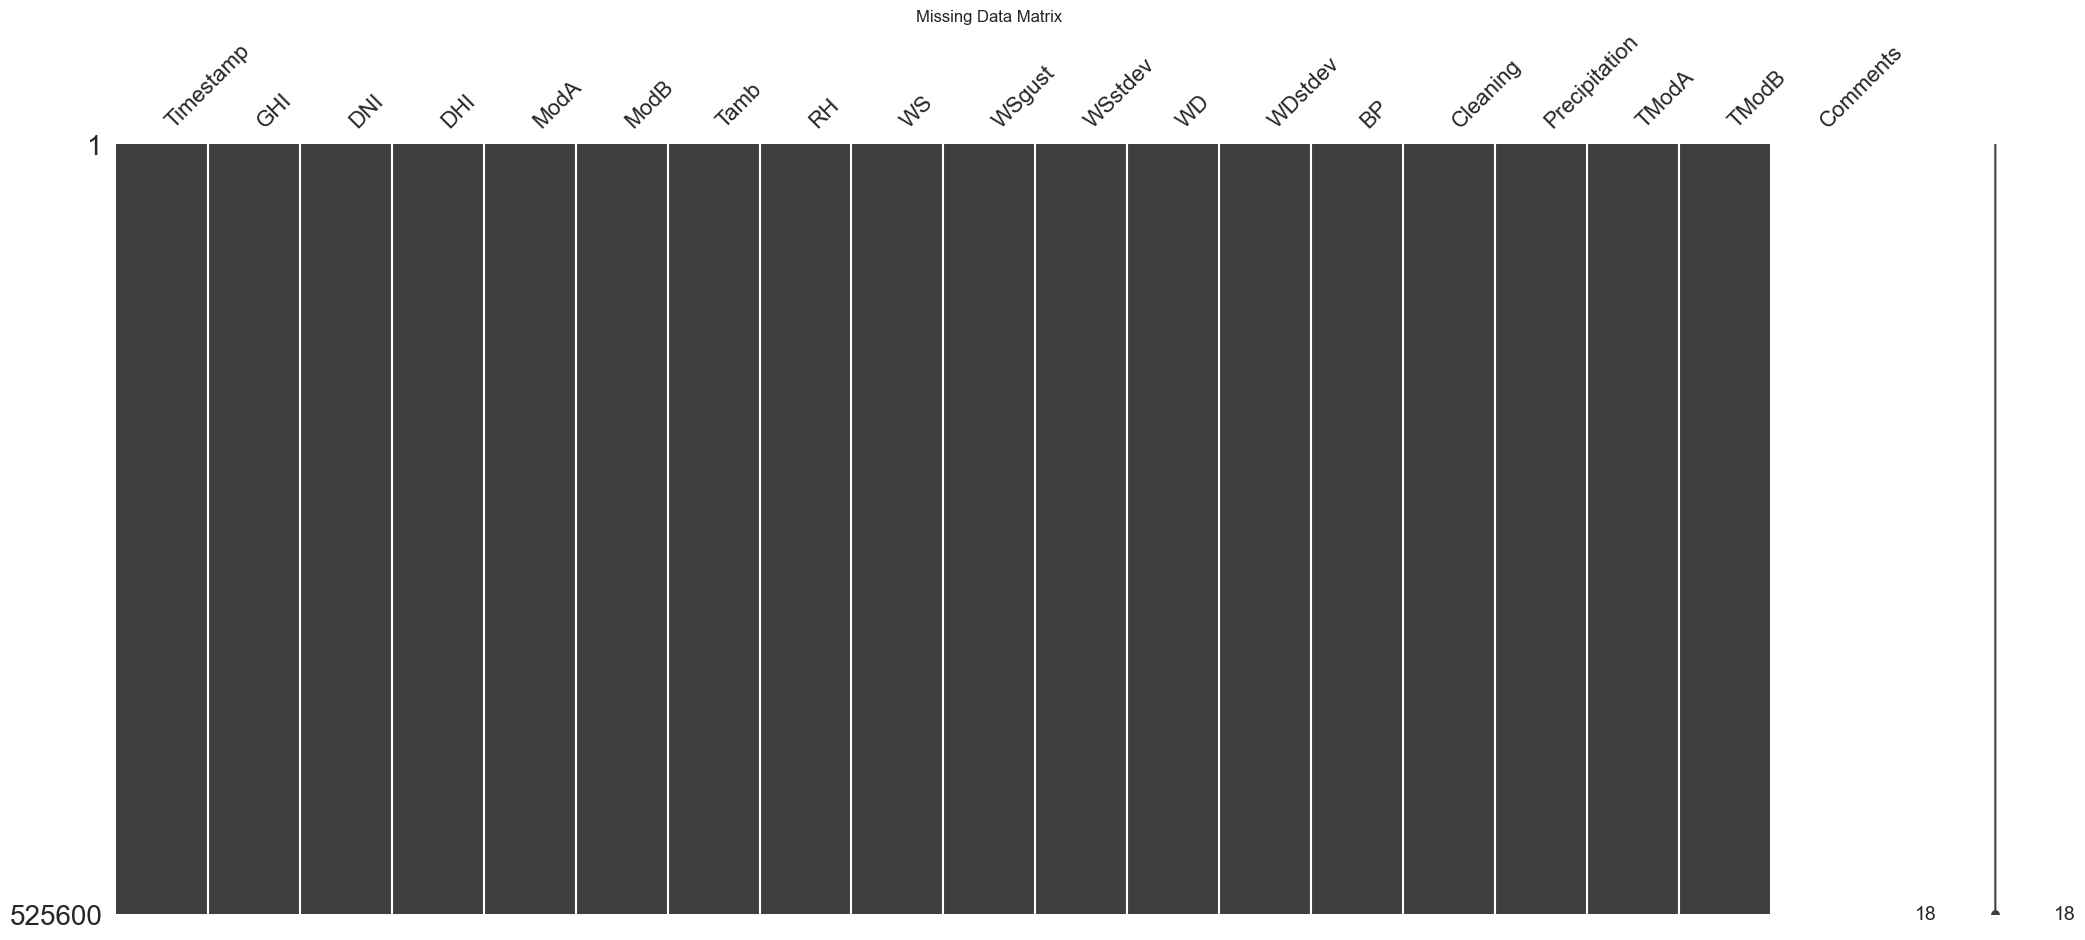

c:\Users\Estifanos Zerihun\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\Estifanos Zerihun\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


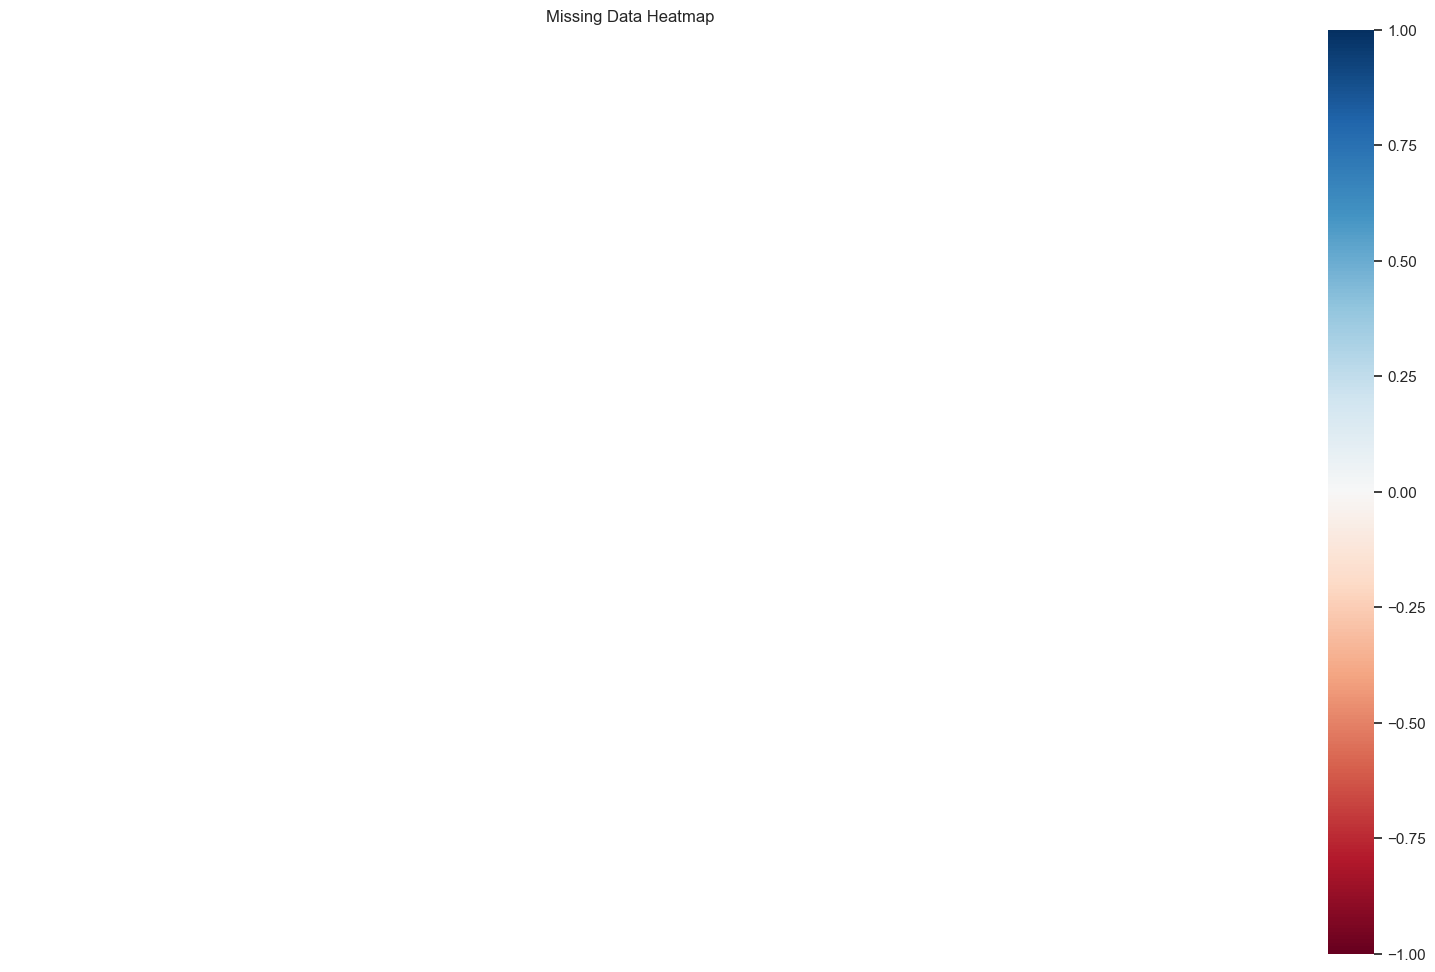

In [3]:
msno.matrix(df)
plt.title("Missing Data Matrix")
plt.show()

msno.heatmap(df)
plt.title("Missing Data Heatmap")
plt.show()


In [4]:
# Select numeric columns with missing values
sensor_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

imputer = SimpleImputer(strategy='median')
df[sensor_cols] = imputer.fit_transform(df[sensor_cols])


In [5]:
def remove_outliers_iqr(data, columns):
    clean_data = data.copy()
    for col in columns:
        Q1 = clean_data[col].quantile(0.25)
        Q3 = clean_data[col].quantile(0.75)
        IQR = Q3 - Q1
        mask = ~((clean_data[col] < Q1 - 1.5 * IQR) | (clean_data[col] > Q3 + 1.5 * IQR))
        clean_data = clean_data[mask]
    return clean_data

df_clean = remove_outliers_iqr(df, sensor_cols)
print(f"Original rows: {len(df)}, Cleaned rows: {len(df_clean)}")


Original rows: 525600, Cleaned rows: 236053


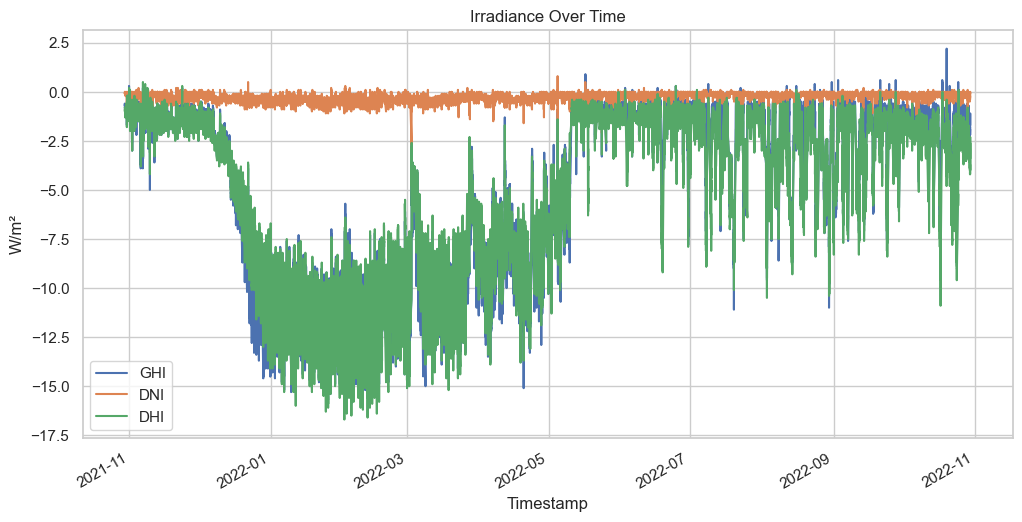

In [6]:
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp', inplace=True)

df_clean[['GHI', 'DNI', 'DHI']].plot()
plt.title("Irradiance Over Time")
plt.ylabel("W/m²")
plt.show()


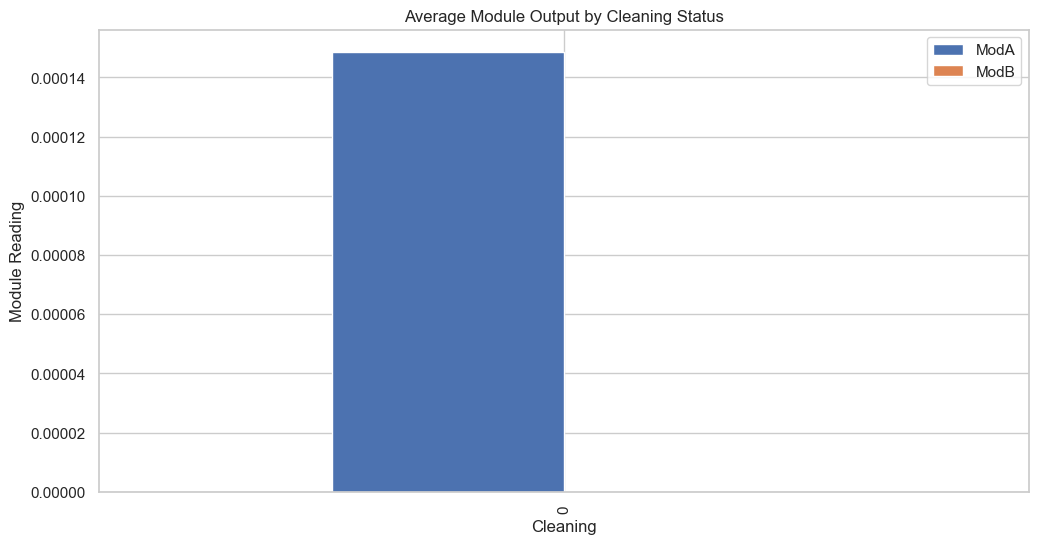

In [7]:
df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title("Average Module Output by Cleaning Status")
plt.ylabel("Module Reading")
plt.show()


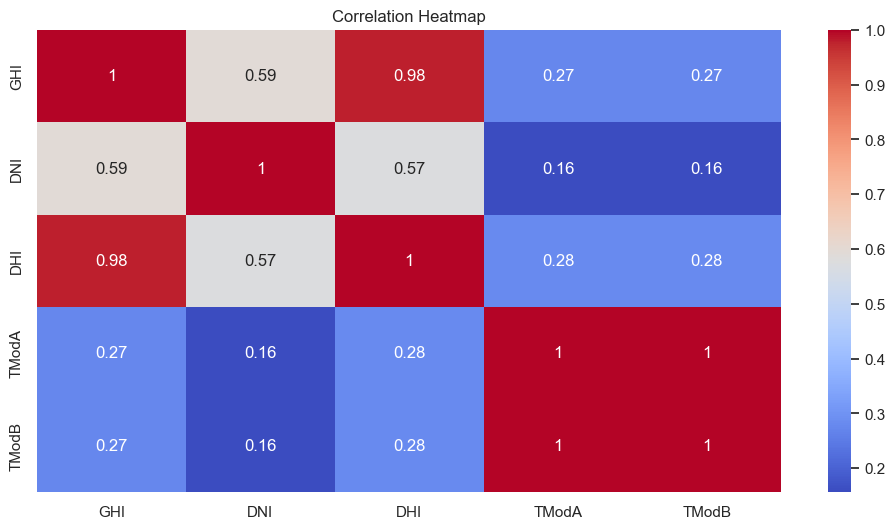

In [8]:
corr = df_clean[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


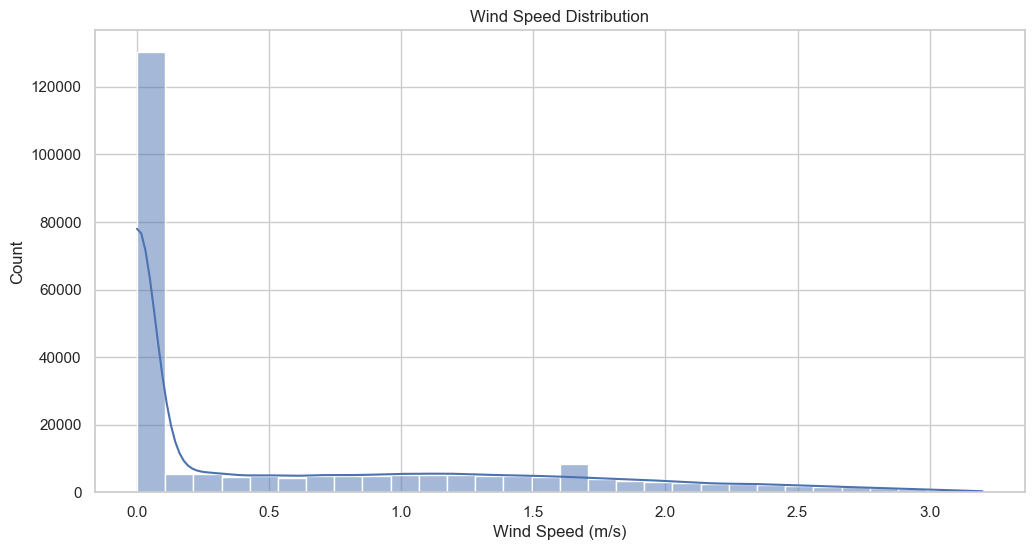

In [9]:
sns.histplot(df_clean['WS'], kde=True, bins=30)
plt.title("Wind Speed Distribution")
plt.xlabel("Wind Speed (m/s)")
plt.show()


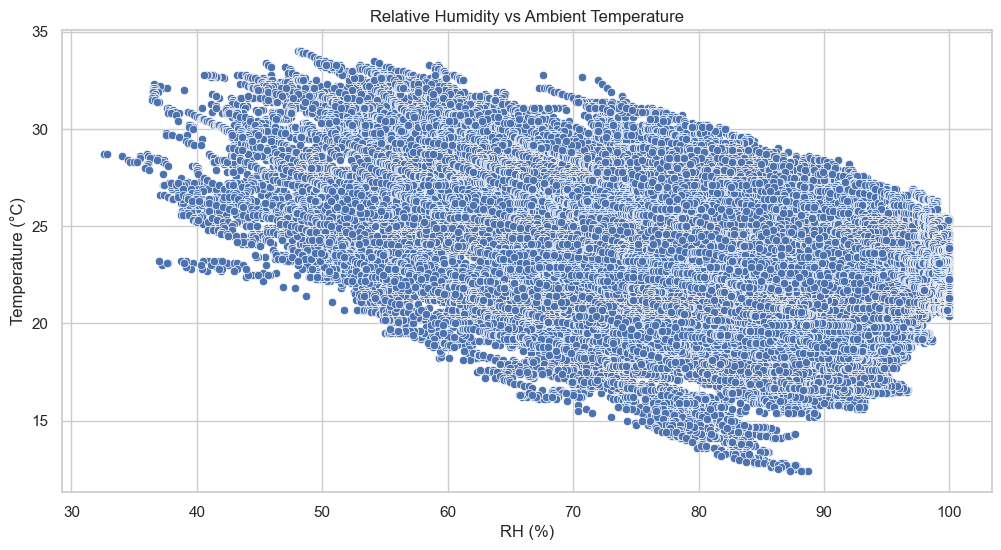

In [10]:
sns.scatterplot(data=df_clean, x='RH', y='Tamb')
plt.title("Relative Humidity vs Ambient Temperature")
plt.xlabel("RH (%)")
plt.ylabel("Temperature (°C)")
plt.show()


In [11]:
df_clean.reset_index().to_csv("../data/sierraleone_cleaned.csv", index=False)
print("Cleaned data saved to data/sierraleone_cleaned.csv")


Cleaned data saved to data/sierraleone_cleaned.csv
